# Plotting Tools

In [36]:
import os
import csv
import glob

import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt

### Basic plotting example

## Plot one run

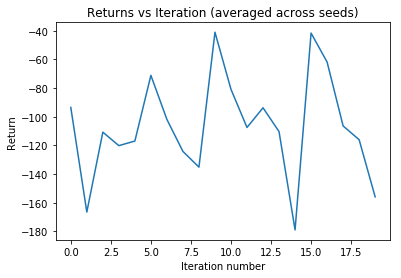

In [100]:
log_dir = '/home/vitchyr/git/handful-of-trials/log/test-pointmass_no_walls/2019-06-28--14:37:32/'
all_returns = []
for log_file in sorted(glob.glob(log_dir + "logs.mat")):
    data = loadmat(log_file)
    all_returns.append(data["returns"][0])

max_trial_length = min(map(len, all_returns))
trimmed_returns = np.array([r[:max_trial_length] for r in all_returns])
average_returns = np.mean(trimmed_returns, axis=0)
# Plot result
plt.figure()
plt.plot(np.arange(len(average_returns)), average_returns)
plt.title("Returns vs Iteration (averaged across seeds)")
plt.xlabel("Iteration number")
plt.ylabel("Return")
plt.show()

In [92]:
print(data['returns'].shape)

(1, 9)


In [94]:
data.keys()

dict_keys(['__globals__', '__version__', 'observations', '__header__', 'rewards', 'returns', 'actions'])

In [98]:
saved = loadmat('/home/vitchyr/git/handful-of-trials/log/test-pointmass_no_walls/2019-06-28--14:37:32/logs.mat')
print(saved.keys())
print(saved['returns'].shape)

dict_keys(['__globals__', '__version__', 'observations', '__header__', 'rewards', 'returns', 'actions'])
(1, 20)
